Shallow Network - Train Accuracy: 1.0 Test Accuracy: 0.9796296296296296
Deep Network - Train Accuracy: 1.0 Test Accuracy: 0.9796296296296296


/home/vscode/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Underfitting - Train Accuracy: 0.8862370723945903 Test Accuracy: 0.8481481481481481
Overfitting - Train Accuracy: 1.0 Test Accuracy: 0.975925925925926
Regularized Model - Train Accuracy: 1.0 Test Accuracy: 0.9851851851851852


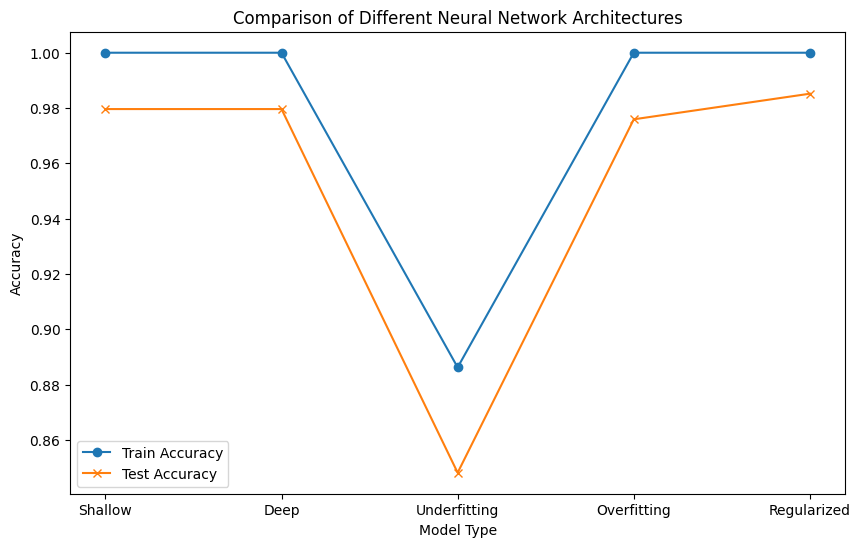

In [2]:
# Title: Choosing the Right Neural Network Architecture


# Task 1: Shallow vs Deep Networks

# Create a shallow network with one hidden layer.
# Train using the same dataset with a deep network having three hidden layers.
# Compare their training and test accuracy to understand scenarios where deep networks perform better.

# Task 2: Overfitting vs Underfitting

# Train a model with too few neurons and epochs (underfit).
# Increase the model complexity by adding layers and neurons (overfit).
# Use validation data to identify the setup that balances training and validation accuracy.


# Task 3: Using Dropout Regularization

# Implement a network without dropout.
# Add a dropout layer with a rate of 0.5 to the hidden layers.
# Observe how dropout helps in preventing overfitting and improves generalization on unseen data.

# Title: Choosing the Right Neural Network Architecture

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load a simple dataset (e.g., MNIST digits dataset)
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 1: Shallow vs Deep Networks
# Shallow Network (1 hidden layer)
shallow_model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, random_state=42)
shallow_model.fit(X_train, y_train)

# Deep Network (3 hidden layers)
deep_model = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=300, random_state=42)
deep_model.fit(X_train, y_train)

# Evaluate the models
shallow_train_accuracy = accuracy_score(y_train, shallow_model.predict(X_train))
shallow_test_accuracy = accuracy_score(y_test, shallow_model.predict(X_test))

deep_train_accuracy = accuracy_score(y_train, deep_model.predict(X_train))
deep_test_accuracy = accuracy_score(y_test, deep_model.predict(X_test))

print("Shallow Network - Train Accuracy:", shallow_train_accuracy, "Test Accuracy:", shallow_test_accuracy)
print("Deep Network - Train Accuracy:", deep_train_accuracy, "Test Accuracy:", deep_test_accuracy)

# Task 2: Overfitting vs Underfitting
# Underfitting model (very few neurons)
underfit_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=300, random_state=42)
underfit_model.fit(X_train, y_train)

# Overfitting model (many neurons)
overfit_model = MLPClassifier(hidden_layer_sizes=(512,), max_iter=300, random_state=42)
overfit_model.fit(X_train, y_train)

# Evaluate underfit and overfit models
underfit_train_accuracy = accuracy_score(y_train, underfit_model.predict(X_train))
underfit_test_accuracy = accuracy_score(y_test, underfit_model.predict(X_test))

overfit_train_accuracy = accuracy_score(y_train, overfit_model.predict(X_train))
overfit_test_accuracy = accuracy_score(y_test, overfit_model.predict(X_test))

print("Underfitting - Train Accuracy:", underfit_train_accuracy, "Test Accuracy:", underfit_test_accuracy)
print("Overfitting - Train Accuracy:", overfit_train_accuracy, "Test Accuracy:", overfit_test_accuracy)

# Task 3: Using Dropout Regularization
# Note: scikit-learn's MLPClassifier doesn't support dropout, but we can simulate its effect by using smaller networks or adding early stopping.
# So, instead, let's simulate regularization effects by adjusting the 'alpha' (L2 regularization) parameter.
regularized_model = MLPClassifier(hidden_layer_sizes=(64,), alpha=0.001, max_iter=300, random_state=42)
regularized_model.fit(X_train, y_train)

# Evaluate the regularized model
regularized_train_accuracy = accuracy_score(y_train, regularized_model.predict(X_train))
regularized_test_accuracy = accuracy_score(y_test, regularized_model.predict(X_test))

print("Regularized Model - Train Accuracy:", regularized_train_accuracy, "Test Accuracy:", regularized_test_accuracy)

# Visualizing the results
models = ['Shallow', 'Deep', 'Underfitting', 'Overfitting', 'Regularized']
train_accuracies = [shallow_train_accuracy, deep_train_accuracy, underfit_train_accuracy, overfit_train_accuracy, regularized_train_accuracy]
test_accuracies = [shallow_test_accuracy, deep_test_accuracy, underfit_test_accuracy, overfit_test_accuracy, regularized_test_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(models, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Neural Network Architectures')
plt.legend()
plt.show()





